In [43]:
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
import matplotlib.pyplot as plt
import seaborn as sns

labelled_posts = pd.read_csv('/Users/jianingjin/Desktop/data analysis/Project/labelled_posts_17327.csv')

In [44]:
# Filter out non-numeric values in the 'created_utc' column
labelled_posts = labelled_posts[pd.to_numeric(labelled_posts['created_utc'], errors='coerce').notnull()]

# Convert 'created_utc' to datetime format
labelled_posts['created_utc'] = pd.to_datetime(labelled_posts['created_utc'], unit='s')

#glimpse of data
labelled_posts.info()
labelled_posts.describe().round(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17327 entries, 0 to 17326
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            17327 non-null  object        
 1   created_utc   17327 non-null  datetime64[ns]
 2   title         17327 non-null  object        
 3   topic         17327 non-null  object        
 4   score         17327 non-null  float64       
 5   num_comments  17327 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 947.6+ KB


,score,num_comments
count,17327.00,17327.00
mean,308.00,109.85
std,1785.37,236.83
min,0.00,10.00
25%,0.00,32.00
50%,8.00,55.00
75%,33.00,97.00
max,63689.00,6951.00


In [45]:
labelled_posts.head()

,id,created_utc,title,topic,score,num_comments
0,k49txn,2020-12-01 00:54:36,cmv: a character doesn't have to come out for ...,Queerness,8.0,26
1,k4a5kz,2020-12-01 01:12:27,cmv: pants with zippered side pockets should z...,Pants,7.0,18
2,k4askm,2020-12-01 01:47:15,cmv: regardless of how you feel you climate ch...,Renewables,1339.0,253
3,k4b12d,2020-12-01 02:00:20,cmv: robert deniro is undermining his legacy b...,Opinion,0.0,35
4,k4bkrk,2020-12-01 02:31:05,cmv: subreddits that allow flaired users only ...,Subreddits,17.0,39


Opinion             1481
Politics             942
Comparison           449
Criticism            283
Education            200
                    ... 
Activists              1
donations              1
Medical evidence       1
Convenience            1
dubbing                1
Name: topic, Length: 3899, dtype: int64


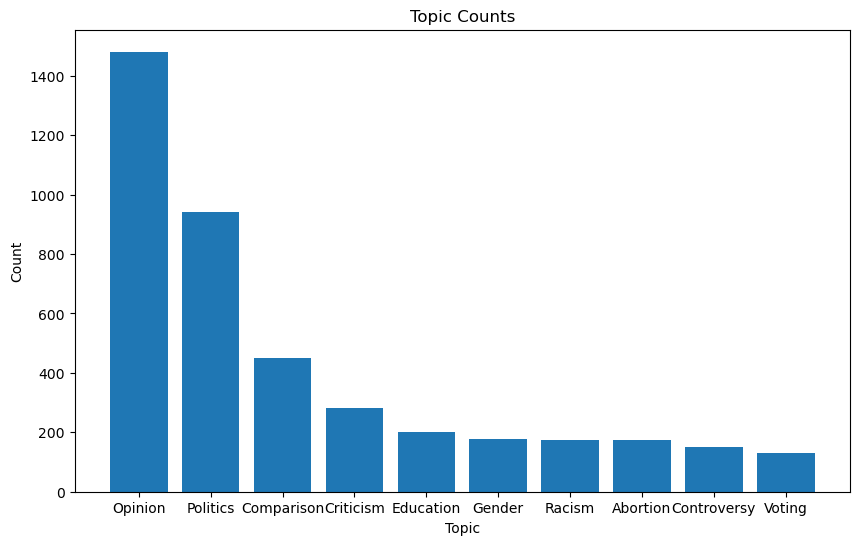

In [46]:
# Count the number of each topic
topic_counts = labelled_posts["topic"].value_counts()

# Print the result
print(topic_counts)

# Create a bar chart of the topic counts
plt.figure(figsize=(10,6))
plt.bar(topic_counts.index[:10], topic_counts[:10])
plt.xlabel("Topic")
plt.ylabel("Count")
plt.title("Topic Counts")
plt.show()

In [47]:
#Mean of score and comments in each topic
labelled_posts.groupby('topic').agg({'score': 'mean', 'num_comments': 'mean'})

,score,num_comments
topic,,
YouTube,0.0,17.0
"""Accuracy""",3.0,11.0
"""Age""",0.0,47.0
"""Appropriation""",21.0,18.0
"""Automation""",4.0,32.0
...,...,...
war,4.0,64.0
warning,0.0,21.0
whisky,12.0,57.0


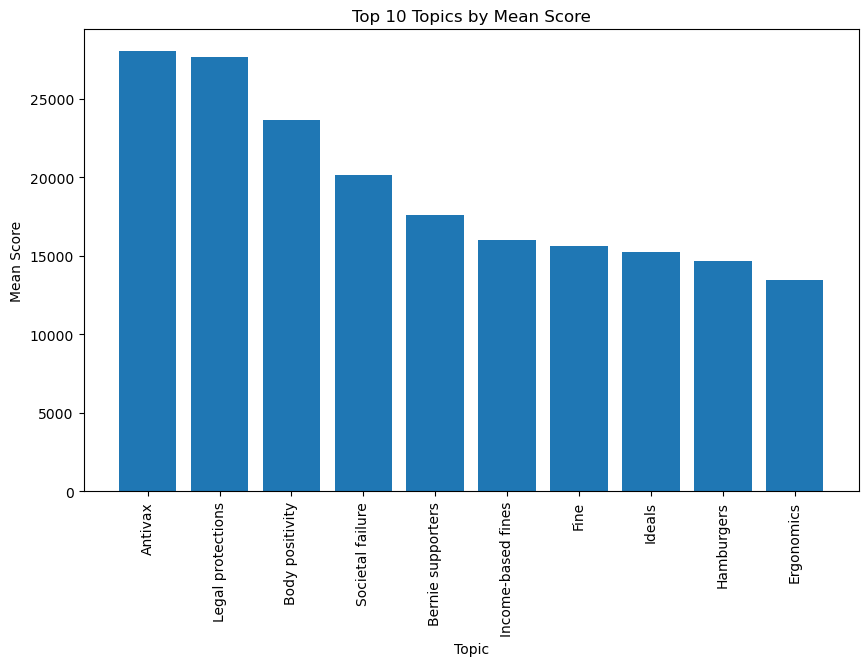

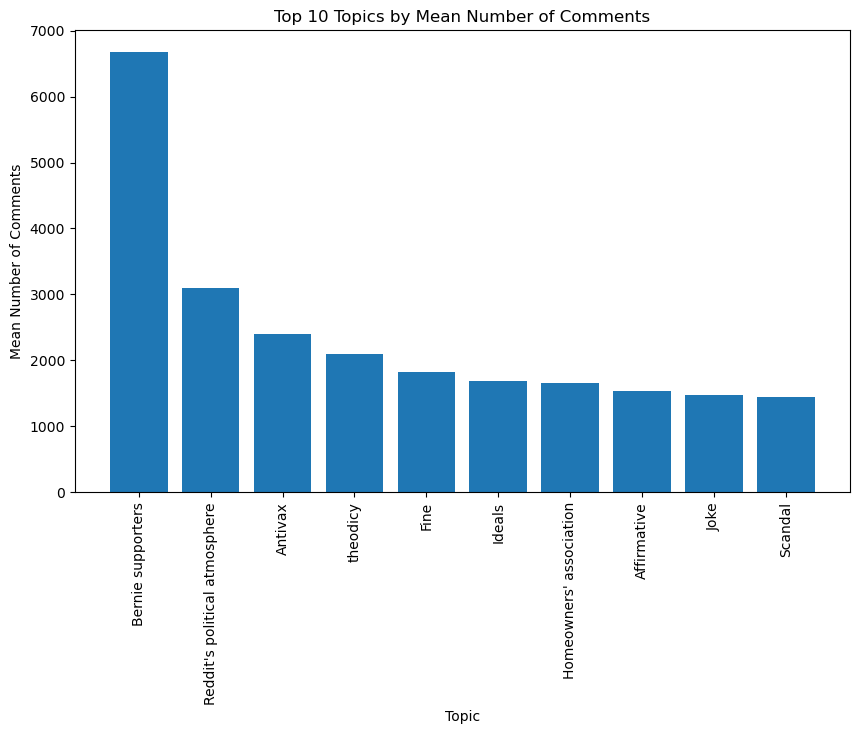

In [53]:
# Calculate the mean of scores for each topic and rank them from high to low
mean_scores = labelled_posts.groupby('topic')['score'].mean().sort_values(ascending=False)[:10]

# Calculate the mean of num_comments for each topic and rank them from high to low
mean_comments = labelled_posts.groupby('topic')['num_comments'].mean().sort_values(ascending=False)[:10]

# Create a bar chart for mean scores
plt.figure(figsize=(10,6))
plt.bar(mean_scores.index, mean_scores.values)
plt.title('Top 10 Topics by Mean Score')
plt.xlabel('Topic')
plt.xticks(rotation=90)
plt.ylabel('Mean Score')
plt.show()

# Create a bar chart for mean num_comments
plt.figure(figsize=(10,6))
plt.bar(mean_comments.index, mean_comments.values)
plt.title('Top 10 Topics by Mean Number of Comments')
plt.xlabel('Topic')
plt.xticks(rotation=90)
plt.ylabel('Mean Number of Comments')
plt.show()

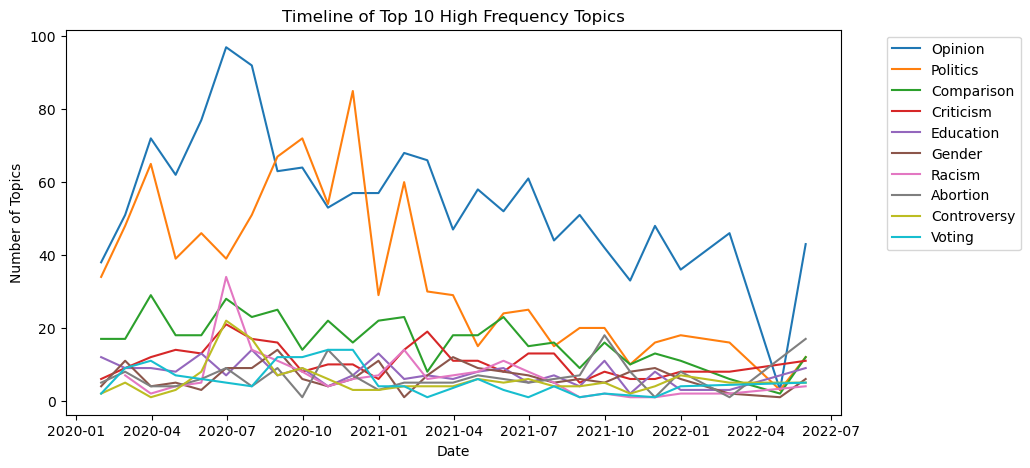

In [57]:
# Get the top 10 high frequency topics
top10_topics = labelled_posts["topic"].value_counts().nlargest(10).index.tolist()

# Filter the dataset to only include the top 10 topics
labelled_posts_top10 = labelled_posts[labelled_posts["topic"].isin(top10_topics)]

# Group the dataset by topic and month
labelled_posts_top10_grouped = labelled_posts_top10.groupby(["topic", pd.Grouper(key="created_utc", freq="M")])["id"].count().reset_index()

# Create a line plot for each topic
plt.figure(figsize=(10,5))
for topic in top10_topics:
    labelled_posts_topic = labelled_posts_top10_grouped[labelled_posts_top10_grouped["topic"] == topic]
    plt.plot(labelled_posts_topic["created_utc"], labelled_posts_topic["id"], label=topic)

# Add x-axis and y-axis labels and title
plt.xlabel("Date")
plt.ylabel("Number of Topics")
plt.title("Timeline of Top 10 High Frequency Topics")

# Add legend
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1))

# Show the plot
plt.show()

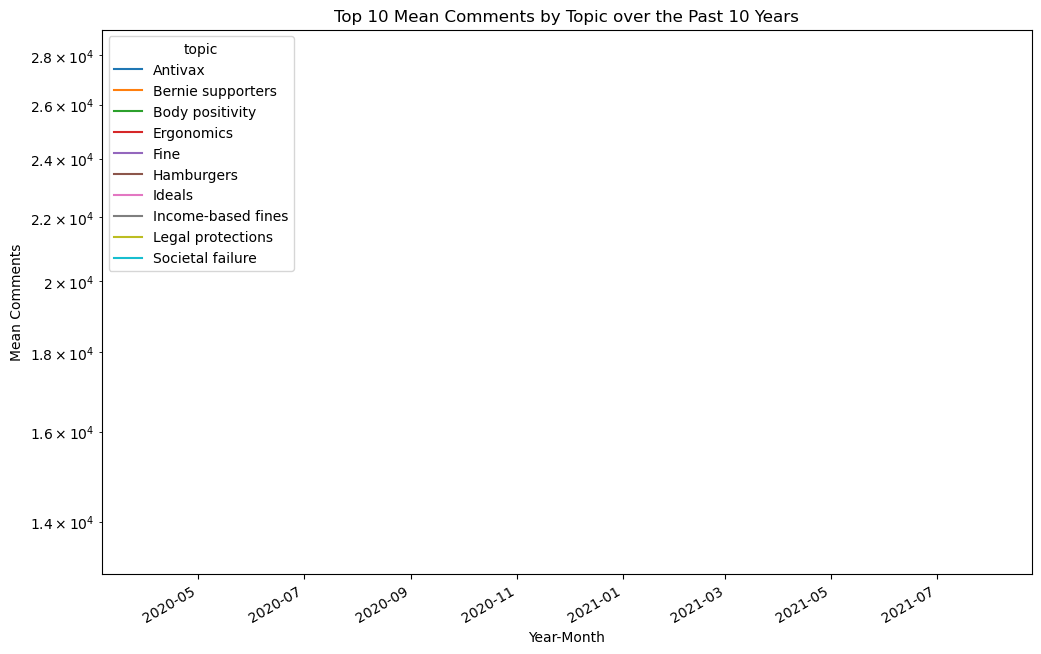

In [69]:
# Group data by topic and year-month, and calculate mean score
labelled_posts_grouped = labelled_posts.groupby(['topic', pd.Grouper(key='created_utc', freq='M')])['score'].mean().reset_index()

# Get top 10 topics by mean score
top_10_topics = labelled_posts_grouped.groupby('topic')['score'].mean().sort_values(ascending=False).head(10).index.tolist()

# Filter data to only include top 10 topics
labelled_posts_filtered = labelled_posts_grouped[labelled_posts_grouped['topic'].isin(top_10_topics)]

# Pivot data to have topic as columns and year-month as index
labelled_posts_pivot = labelled_posts_filtered.pivot(index='created_utc', columns='topic', values='score')

# Plot the data
labelled_posts_pivot.plot(figsize=(12, 8))
plt.xlabel('Year-Month')
plt.ylabel('Mean Comments')
plt.title('Top 10 Mean Comments by Topic over the Past 10 Years')
plt.yscale('log')
plt.show()

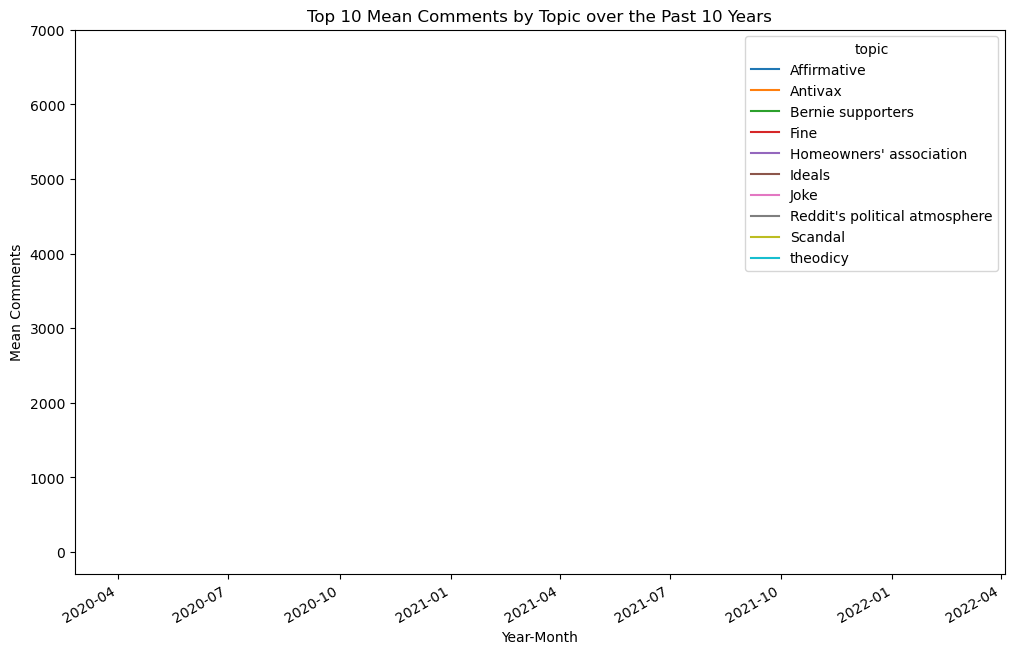

In [41]:
# Group data by topic and year-month, and calculate mean number of comments
labelled_posts_grouped = labelled_posts.groupby(['topic', pd.Grouper(key='created_utc', freq='M')])['num_comments'].mean().reset_index()

# Get top 10 topics by mean number of comments
top_10_topics = labelled_posts_grouped.groupby('topic')['num_comments'].mean().sort_values(ascending=False).head(10).index.tolist()

# Filter data to only include top 10 topics
labelled_posts_filtered = labelled_posts_grouped[labelled_posts_grouped['topic'].isin(top_10_topics)]

# Pivot data to have topic as columns and year-month as index
labelled_posts_pivot = labelled_posts_filtered.pivot(index='created_utc', columns='topic', values='num_comments')

# Plot the data
labelled_posts_pivot.plot(figsize=(12, 8))
plt.xlabel('Year-Month')
plt.ylabel('Mean Number of Comments')
plt.title('Top 10 Mean Comments by Topic over the Past 10 Years')
plt.show()


Top Posts by Score:
           id         created_utc  \
6727   fdziov 2020-03-05 18:22:18   
775    hlpd7d 2020-07-05 16:25:43   
15547  mzr23d 2021-04-27 15:30:56   
1783   iq41dt 2020-09-10 14:11:37   
10933  kvwbxj 2021-01-12 17:36:28   
9723   p9c6x2 2021-08-22 13:09:50   
5698   jfz65t 2020-10-22 13:01:07   
1140   hs9xnd 2020-07-16 13:47:38   
11030  kyjzxi 2021-01-16 14:37:57   
793    hm5di9 2020-07-06 10:44:21   

                                                   title           topic  \
6727   cmv: mike bloomberg's campaign is proof that t...        Taxation   
775    cmv: kanye west is a shill for president trump...        Politics   
15547  cmv: most americans who oppose a national heal...      Healthcare   
1783   cmv: donald trump has not made a single lastin...         Opinion   
10933  cmv: being a conservative is the least christ-...        Politics   
9723   cmv: voluntarily unvaccinated people should be...        Pandemic   
5698   cmv: the ‘work hard and don’t gi

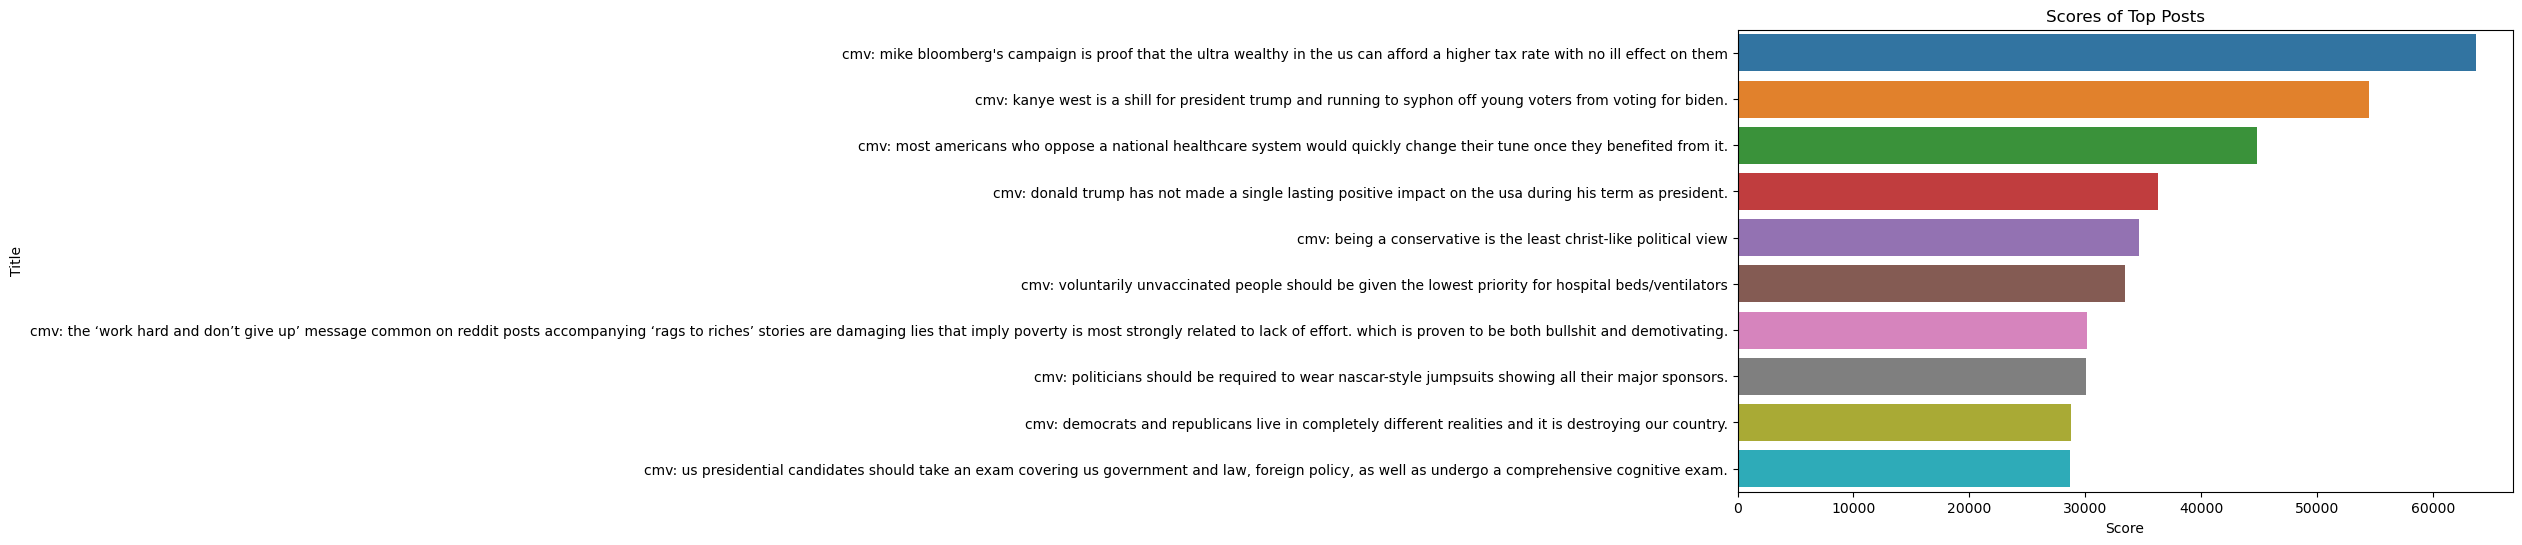

In [33]:
# Sort the data by score in descending order and show the top 10 posts
top_score_posts = labelled_posts.sort_values('score', ascending=False).head(10)
print("\nTop Posts by Score:")
print(top_score_posts)

# Plot the scores of the top 10 posts
plt.figure(figsize=(10,6))
sns.barplot(x=top_score_posts['score'], y=top_score_posts['title'])
plt.title('Scores of Top Posts')
plt.xlabel('Score')
plt.ylabel('Title')
plt.show()


Top Posts by Comment:
           id         created_utc  \
15547  mzr23d 2021-04-27 15:30:56   
6650   fcx4au 2020-03-03 16:30:31   
1783   iq41dt 2020-09-10 14:11:37   
15414  mvqyoq 2021-04-21 22:20:08   
6727   fdziov 2020-03-05 18:22:18   
10933  kvwbxj 2021-01-12 17:36:28   
5068   jx3dhv 2020-11-19 14:12:58   
12212  pkz0ap 2021-09-09 14:34:15   
5542   jb2gut 2020-10-14 15:10:01   
13999  lnkhwg 2021-02-19 16:51:05   

                                                   title              topic  \
15547  cmv: most americans who oppose a national heal...         Healthcare   
6650   cmv: bernie supporters who would sit out if he...  Bernie supporters   
1783   cmv: donald trump has not made a single lastin...            Opinion   
15414  cmv: the prophet muhammad, claimed under islam...        Controversy   
6727   cmv: mike bloomberg's campaign is proof that t...           Taxation   
10933  cmv: being a conservative is the least christ-...           Politics   
5068   cmv: argu

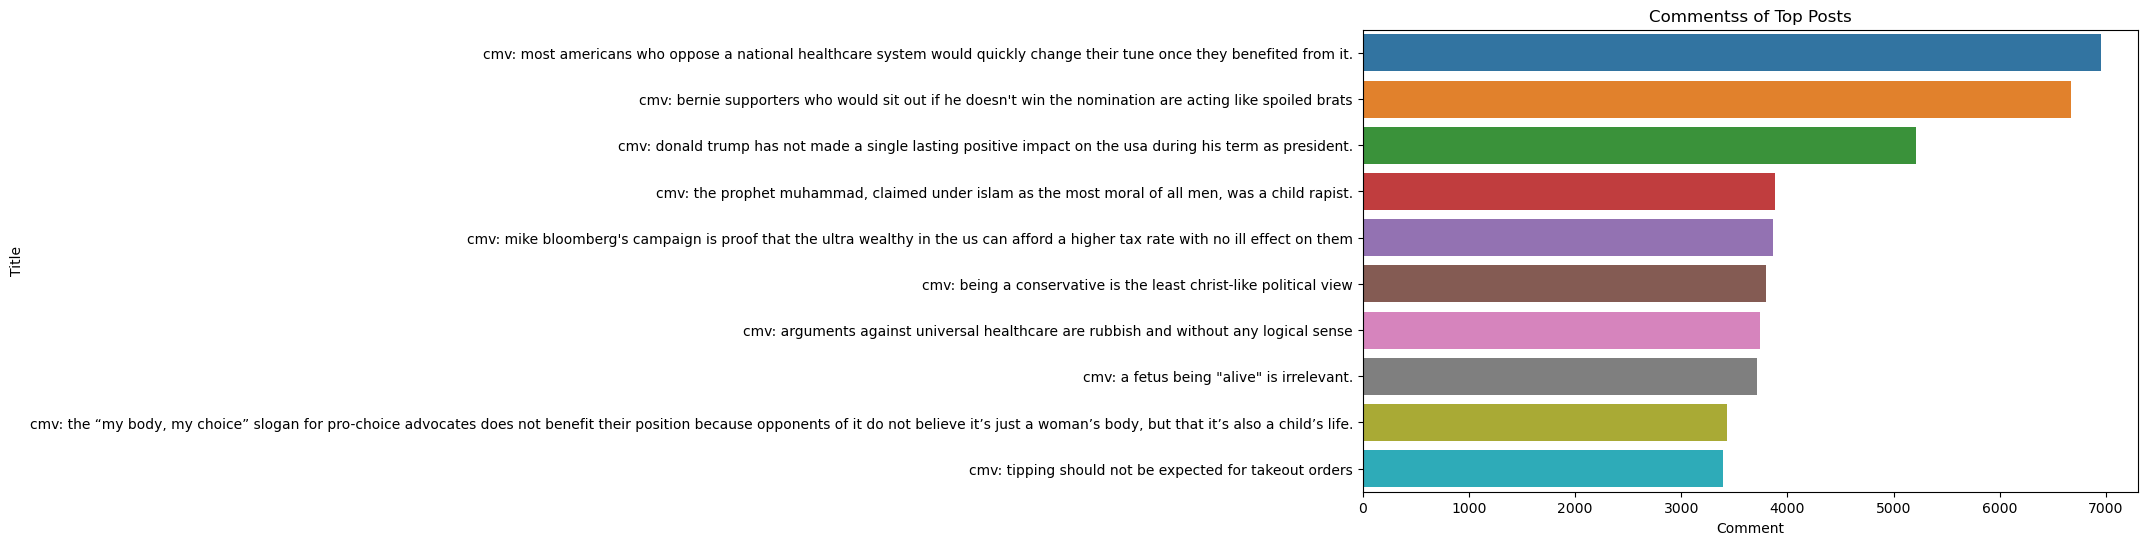

In [34]:
# Sort the data by score in descending order and show the top 10 posts
top_comment_posts = labelled_posts.sort_values('num_comments', ascending=False).head(10)
print("\nTop Posts by Comment:")
print(top_comment_posts)

# Plot the scores of the top 10 posts
plt.figure(figsize=(10,6))
sns.barplot(x=top_comment_posts['num_comments'], y=top_comment_posts['title'])
plt.title('Commentss of Top Posts')
plt.xlabel('Comment')
plt.ylabel('Title')
plt.show()

In [42]:
# Check the distribution of the 'score' column
print("\nScore Distribution:")
print(labelled_posts['score'].value_counts(normalize=True).head(10))

# Check the distribution of the 'num_comments' column
print("\nNumber of Comments Distribution:")
print(labelled_posts['num_comments'].value_counts(normalize=True).head(10))


Score Distribution:
0.0    0.323137
3.0    0.027991
1.0    0.025509
2.0    0.024528
4.0    0.024470
6.0    0.022335
5.0    0.022220
7.0    0.021931
8.0    0.020373
9.0    0.018007
Name: score, dtype: float64

Number of Comments Distribution:
23    0.014544
29    0.014082
26    0.013851
28    0.013678
27    0.013620
36    0.013447
31    0.013447
24    0.013332
35    0.012928
30    0.012870
Name: num_comments, dtype: float64



Score Distribution:
0.0    0.323137
3.0    0.027991
1.0    0.025509
2.0    0.024528
4.0    0.024470
6.0    0.022335
5.0    0.022220
7.0    0.021931
8.0    0.020373
9.0    0.018007
Name: score, dtype: float64


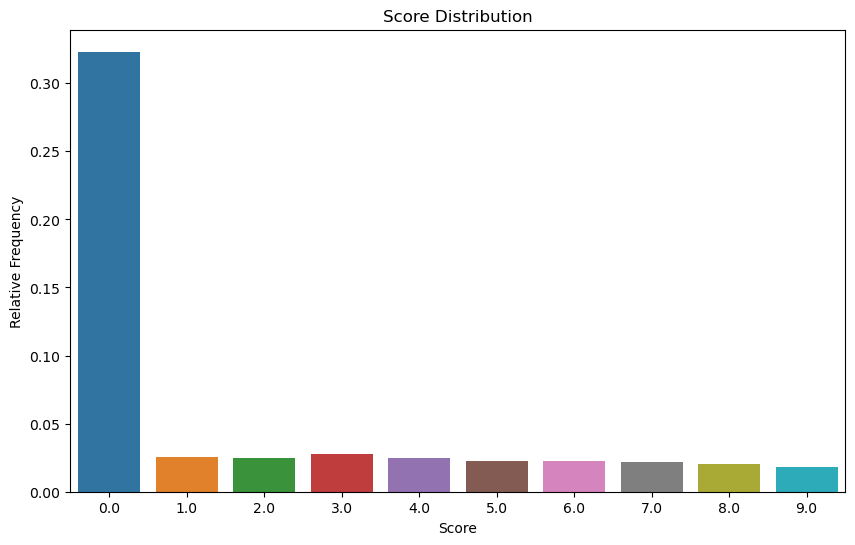


Number of Comments Distribution:
23    0.014544
29    0.014082
26    0.013851
28    0.013678
27    0.013620
36    0.013447
31    0.013447
24    0.013332
35    0.012928
30    0.012870
Name: num_comments, dtype: float64


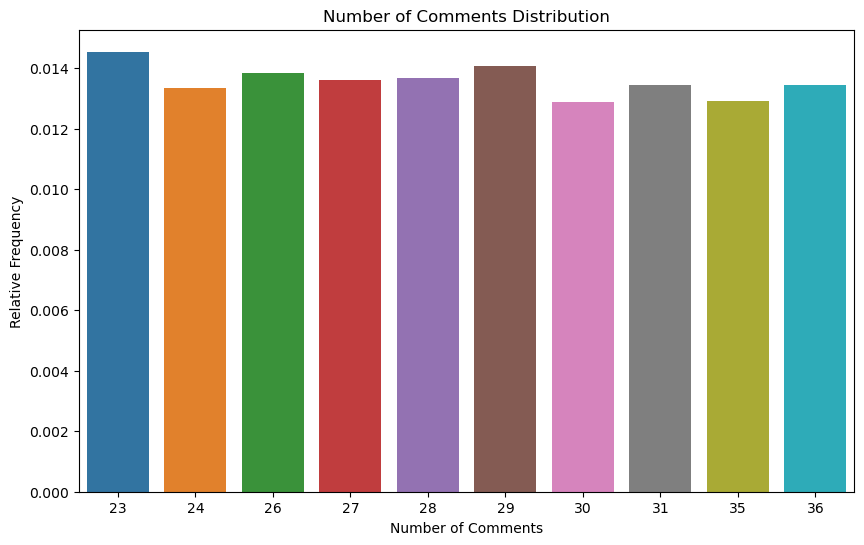

In [19]:
# Check the distribution of the 'score' column
print("\nScore Distribution:")
score_counts = labelled_posts['score'].value_counts(normalize=True).head(10)
print(score_counts)
plt.figure(figsize=(10,6))
sns.barplot(x=score_counts.index, y=score_counts.values)
plt.title('Score Distribution')
plt.xlabel('Score')
plt.ylabel('Relative Frequency')
plt.show()

# Check the distribution of the 'num_comments' column
print("\nNumber of Comments Distribution:")
comment_counts = labelled_posts['num_comments'].value_counts(normalize=True).head(10)
print(comment_counts)
plt.figure(figsize=(10,6))
sns.barplot(x=comment_counts.index, y=comment_counts.values)
plt.title('Number of Comments Distribution')
plt.xlabel('Number of Comments')
plt.ylabel('Relative Frequency')
plt.show()